This project 

In [51]:
# Importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
fashion_data = pd.read_csv("/Users/dhanrajtentu/Downloads/Projects/Fashion Botique Sale/fashion_boutique_dataset.csv")

In [53]:
fashion_data.head()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,2025-07-05,37,3.0,False,NaN
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2025-08-06,2,2.5,False,NaN
2,FB000003,Accessories,Uniqlo,Winter,NaN,Black,33.80,0.0,33.80,2025-08-06,22,4.3,False,NaN
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,2025-07-07,48,2.6,False,NaN
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,2025-08-06,10,NaN,False,NaN


In [54]:
fashion_data.tail()

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating,is_returned,return_reason
2171,FB002172,Tops,Mango,Summer,XL,Black,31.41,0.0,31.41,2025-08-06,10,2.1,False,NaN
2172,FB002173,Dresses,Banana Republic,Winter,L,Brown,50.58,0.0,50.58,2025-08-06,1,3.1,True,Changed Mind
2173,FB002174,Accessories,Banana Republic,Winter,NaN,Beige,79.37,54.8,35.88,2025-08-06,40,2.6,False,NaN
2174,FB002175,Bottoms,Ann Taylor,Summer,XL,Pink,105.52,0.0,105.52,2025-08-06,20,4.9,True,Size Issue
2175,FB002176,Shoes,Ann Taylor,Summer,XXL,White,154.02,0.0,154.02,2025-08-06,23,1.3,False,NaN


In [55]:
fashion_data['purchase_date'] = pd.to_datetime(fashion_data['purchase_date'])

In [56]:
fashion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product_id           2176 non-null   object        
 1   category             2176 non-null   object        
 2   brand                2176 non-null   object        
 3   season               2176 non-null   object        
 4   size                 1685 non-null   object        
 5   color                2176 non-null   object        
 6   original_price       2176 non-null   float64       
 7   markdown_percentage  2176 non-null   float64       
 8   current_price        2176 non-null   float64       
 9   purchase_date        2176 non-null   datetime64[ns]
 10  stock_quantity       2176 non-null   int64         
 11  customer_rating      1814 non-null   float64       
 12  is_returned          2176 non-null   bool          
 13  return_reason        320 non-null

In [57]:
fashion_data.isnull().sum()

product_id                0
category                  0
brand                     0
season                    0
size                    491
color                     0
original_price            0
markdown_percentage       0
current_price             0
purchase_date             0
stock_quantity            0
customer_rating         362
is_returned               0
return_reason          1856
dtype: int64

In [58]:
fashion_data.describe()

,original_price,markdown_percentage,current_price,purchase_date,stock_quantity,customer_rating
count,2176.000000,2176.000000,2176.000000,2176,2176.000000,1814.000000
mean,97.200340,12.144715,85.499596,2025-06-21 23:33:31.764705792,24.937960,2.986604
min,15.140000,0.000000,7.290000,2024-08-06 00:00:00,0.000000,1.000000
25%,57.872500,0.000000,46.845000,2025-08-06 00:00:00,13.000000,2.000000
50%,88.600000,0.000000,74.885000,2025-08-06 00:00:00,25.000000,3.000000
75%,127.630000,22.425000,112.865000,2025-08-06 00:00:00,37.000000,4.000000
max,249.980000,59.900000,249.980000,2025-08-06 00:00:00,50.000000,5.000000
std,51.637345,18.417786,50.091354,NaN,14.451387,1.159722


Let us do some visualisations

In [59]:
fashion_data.columns

Index(['product_id', 'category', 'brand', 'season', 'size', 'color',
       'original_price', 'markdown_percentage', 'current_price',
       'purchase_date', 'stock_quantity', 'customer_rating', 'is_returned',
       'return_reason'],
      dtype='object')

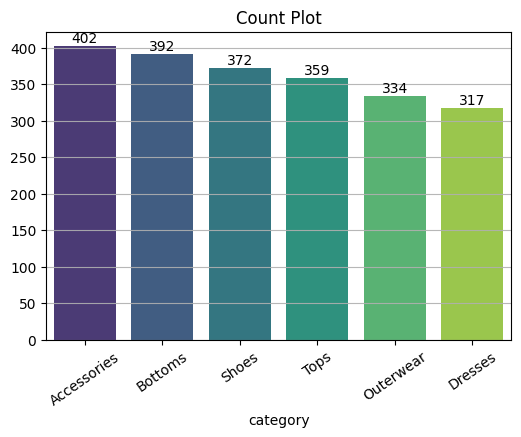

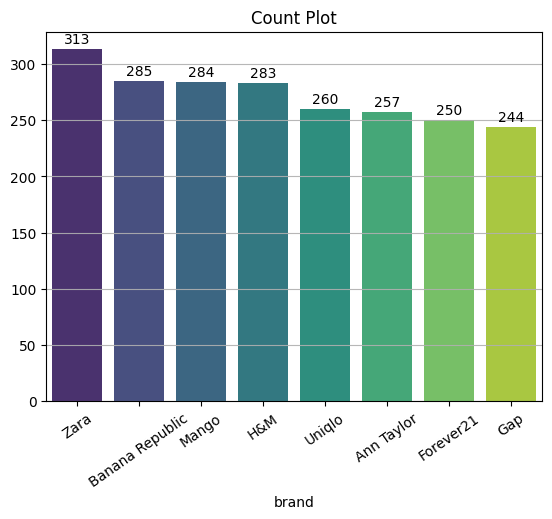

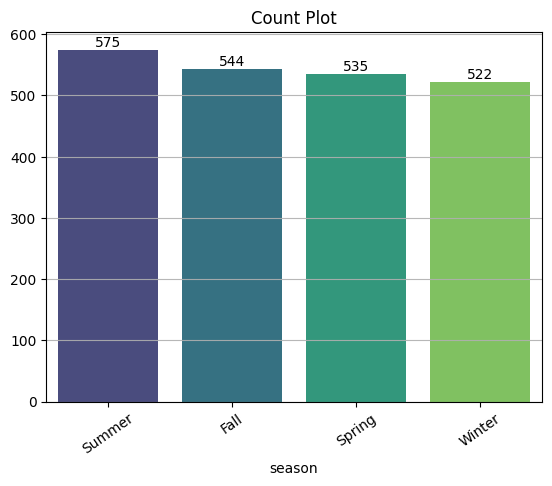

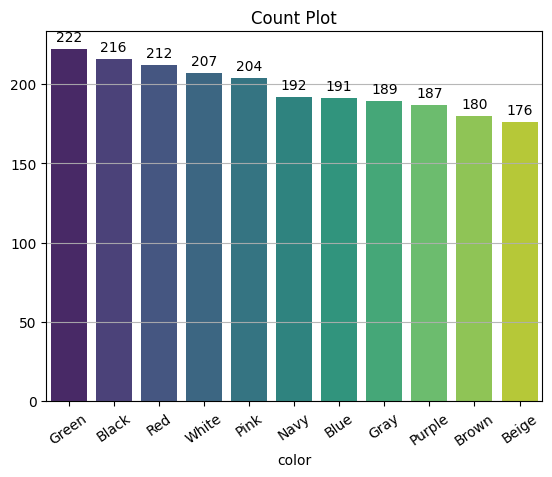

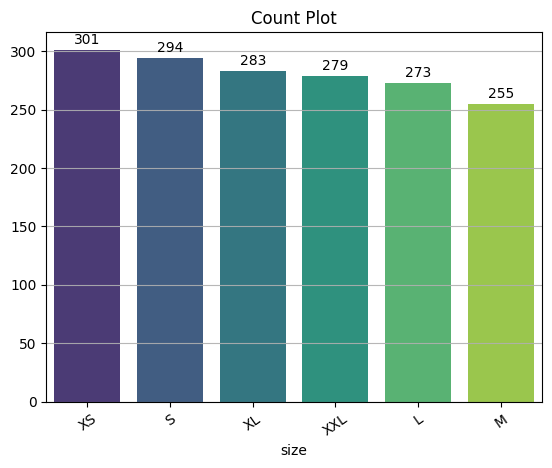

In [60]:
#Count
category_counts = fashion_data['category'].value_counts()
brand_counts = fashion_data['brand'].value_counts()
season_counts = fashion_data['season'].value_counts()
size_counts = fashion_data['size'].value_counts()
color_counts = fashion_data['color'].value_counts()
count_list = [category_counts, brand_counts, season_counts, color_counts,size_counts]

plt.figure(figsize=(6,4))
for bar in count_list:
    sns.barplot(x = bar.index,hue=bar.index,legend=False, y=bar.values, palette='viridis')
    plt.title("Count Plot")
    for i, v in enumerate(bar.values):
        plt.text(i,v +5, str(v), ha="center", fontweight = 9)
    plt.grid(axis="y", linestyle = "-", alpha = 0.9)
    plt.xticks(rotation =35)
    plt.show()

    

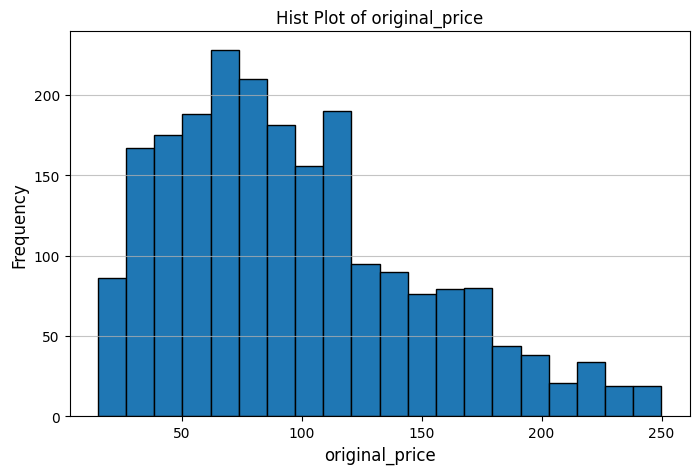

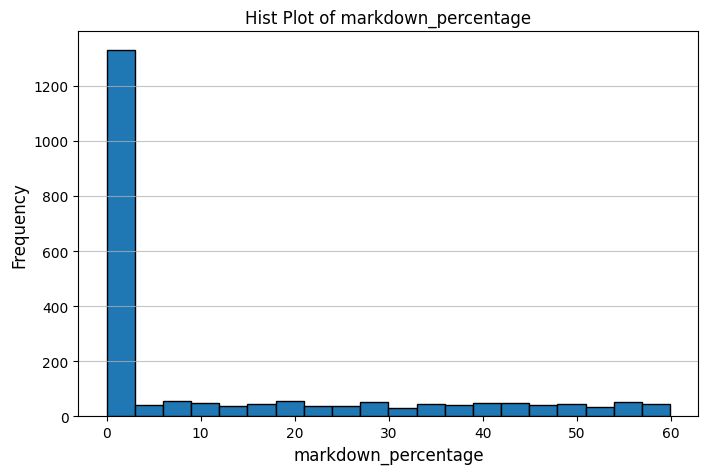

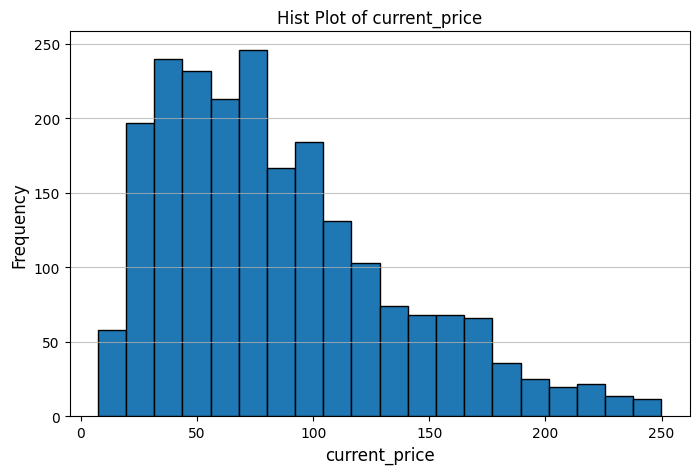

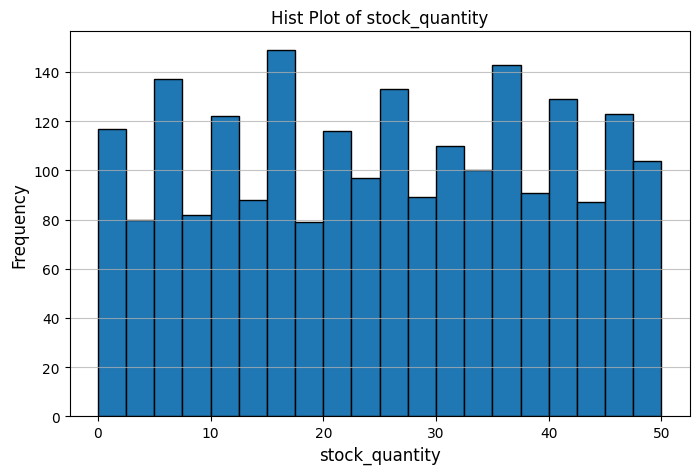

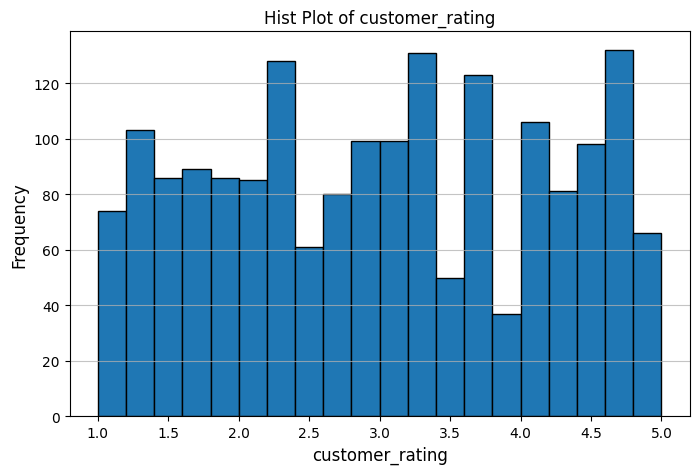

In [61]:
# Hist Plot
# Select only numeric cols
numeric_col = fashion_data.select_dtypes(include=['number']).columns

#Plot 
for col in numeric_col:
    plt.figure(figsize=(8,5))
    plt.hist(fashion_data[col].dropna(),bins = 20, edgecolor="black")
    plt.title(f"Hist Plot of {col}")
    plt.xlabel(col, fontsize =12)
    plt.ylabel("Frequency", fontsize =12)
    plt.grid(axis="y", alpha = 0.75)
    plt.show()

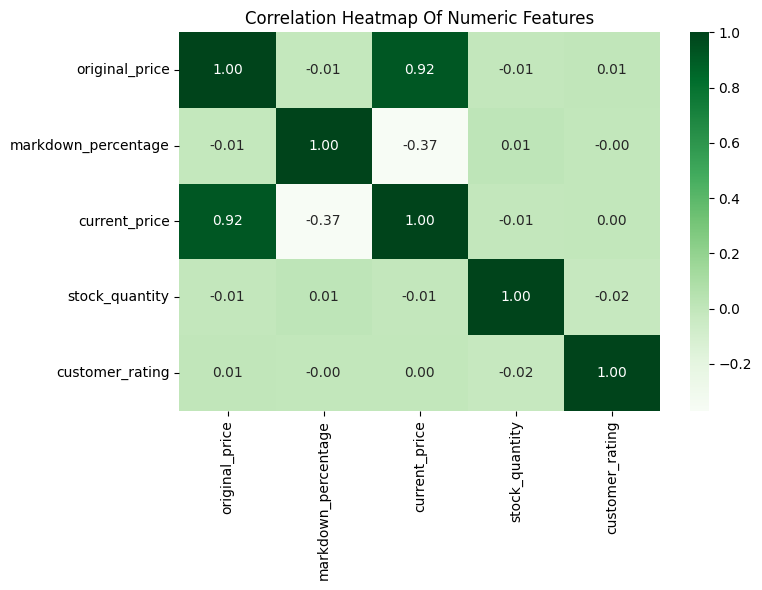

In [62]:
#Compute Correlation
numeric_columns = fashion_data.select_dtypes(include=['number'])
corr_matrix = numeric_columns.corr()

#Plot Heat map
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="Greens",
    cbar=True
)
plt.title("Correlation Heatmap Of Numeric Features")
plt.tight_layout()
plt.show()

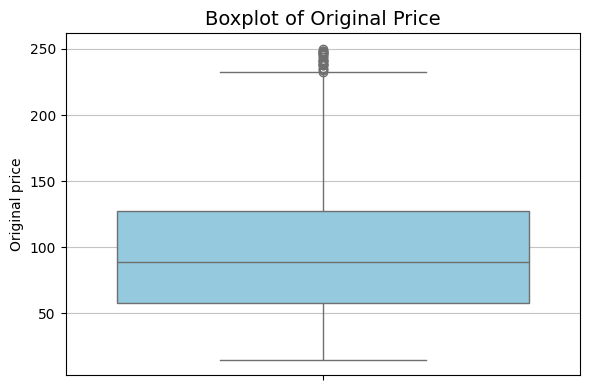

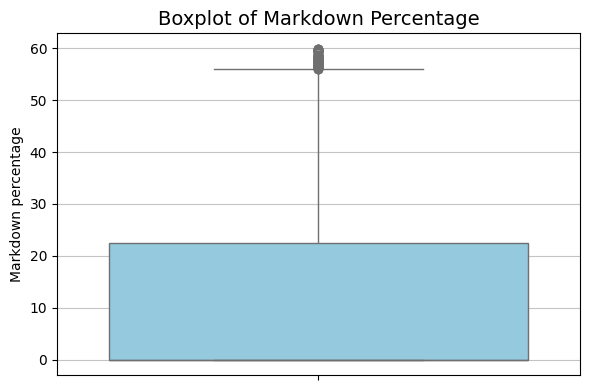

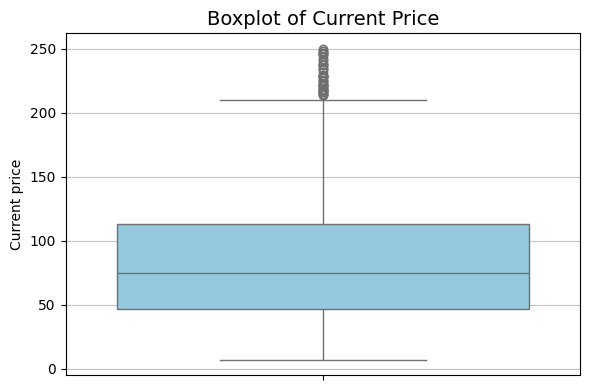

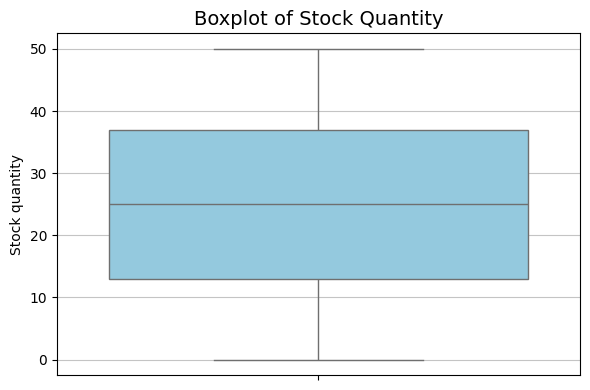

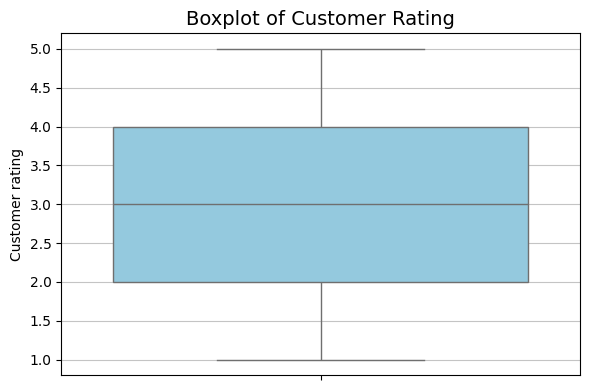

In [63]:
for col in numeric_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=fashion_data,y=col, color="skyblue")
    plt.title(f"Boxplot of {col.replace('_', ' ').title()}" ,fontsize=14)
    plt.ylabel(col.replace("_"," ").capitalize())
    plt.grid(axis="y",alpha = 0.75)
    plt.tight_layout()
    plt.show()


In [64]:
# Stock value = stock quantity x price
if 'current_price' in fashion_data.columns and 'stock_quantity' in fashion_data.columns:
    fashion_data['stock_value'] = fashion_data['current_price'] * fashion_data['stock_quantity']


# Return Rate(group wise)
if 'brand' in fashion_data.columns and 'is_returned' in fashion_data.columns:
    brand_return_rate = fashion_data.groupby('brand')['is_returned'].mean()
    fashion_data['brand_return_rate'] = fashion_data["brand"].map(brand_return_rate)

# price per rating
if 'current_price' in fashion_data.columns and 'customer_rating' in fashion_data.columns:
    fashion_data['price_per_rating'] = fashion_data['current_price']/fashion_data['customer_rating'].replace(0, pd.NA)
       

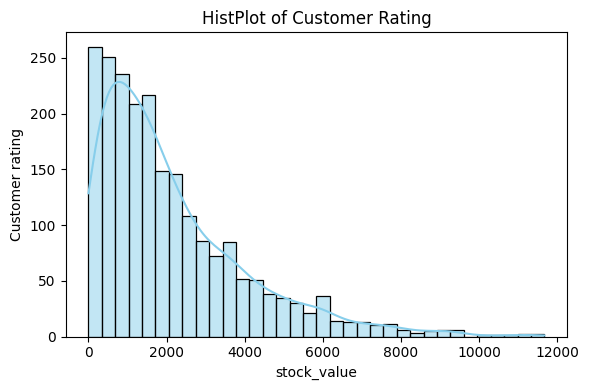

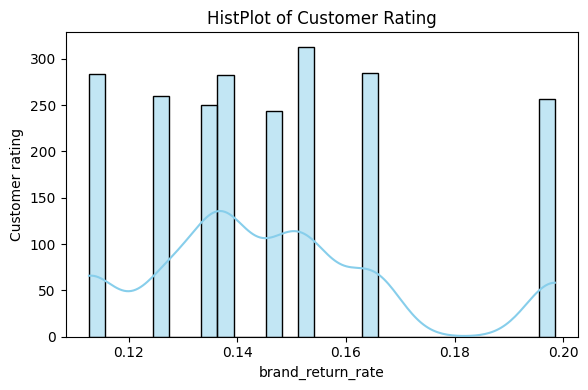

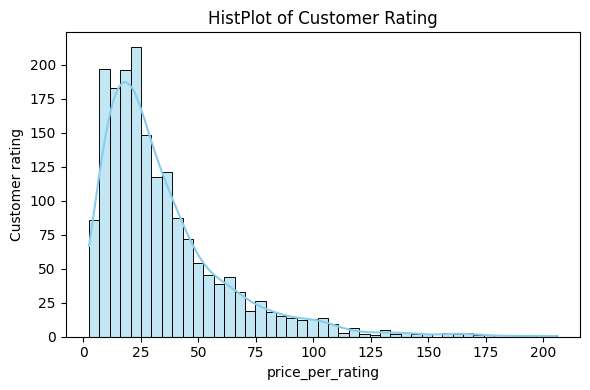

In [65]:
engineered_cols = ['stock_value', 'brand_return_rate', 'price_per_rating']

for cols in engineered_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(fashion_data[cols].dropna(), kde=True, color='skyblue')
    plt.title(f"HistPlot of {col.replace('_',' ').title()}")
    plt.ylabel(col.replace("_",' ').capitalize())
    plt.tight_layout()
    plt.show()

In [66]:
fashion_data.columns

Index(['product_id', 'category', 'brand', 'season', 'size', 'color',
       'original_price', 'markdown_percentage', 'current_price',
       'purchase_date', 'stock_quantity', 'customer_rating', 'is_returned',
       'return_reason', 'stock_value', 'brand_return_rate',
       'price_per_rating'],
      dtype='object')

In [67]:
# Time for some mechine learning
# Drop / fill missing value
fashion_data['size'] = fashion_data['size'].fillna("unknown")
fashion_data['customer_rating'] = fashion_data['customer_rating'].fillna(fashion_data['customer_rating'].mean())
fashion_data['return_reason'] = fashion_data['return_reason'].fillna('unknown')

In [68]:
fashion_data['purchase_month'] = fashion_data['purchase_date'].dt.month
fashion_data['purchase_year'] = fashion_data['purchase_date'].dt.year
fashion_data= fashion_data.drop('purchase_date', axis=1)

In [69]:
fashion_data

,product_id,category,brand,season,size,color,original_price,markdown_percentage,current_price,stock_quantity,customer_rating,is_returned,return_reason,stock_value,brand_return_rate,price_per_rating,purchase_month,purchase_year
0,FB000001,Outerwear,Zara,Spring,XL,Red,196.01,0.0,196.01,37,3.000000,False,unknown,7252.37,0.153355,65.336667,7,2025
1,FB000002,Tops,Uniqlo,Winter,L,Pink,119.64,0.0,119.64,2,2.500000,False,unknown,239.28,0.126923,47.856000,8,2025
2,FB000003,Accessories,Uniqlo,Winter,unknown,Black,33.80,0.0,33.80,22,4.300000,False,unknown,743.60,0.126923,7.860465,8,2025
3,FB000004,Shoes,Uniqlo,Spring,XL,Black,75.36,0.0,75.36,48,2.600000,False,unknown,3617.28,0.126923,28.984615,7,2025
4,FB000005,Tops,Banana Republic,Winter,XL,Black,105.02,0.0,105.02,10,2.986604,False,unknown,1050.20,0.164912,NaN,8,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,FB002172,Tops,Mango,Summer,XL,Black,31.41,0.0,31.41,10,2.100000,False,unknown,314.10,0.112676,14.957143,8,2025
2172,FB002173,Dresses,Banana Republic,Winter,L,Brown,50.58,0.0,50.58,1,3.100000,True,Changed Mind,50.58,0.164912,16.316129,8,2025
2173,FB002174,Accessories,Banana Republic,Winter,unknown,Beige,79.37,54.8,35.88,40,2.600000,False,unknown,1435.20,0.164912,13.800000,8,2025
2174,FB002175,Bottoms,Ann Taylor,Summer,XL,Pink,105.52,0.0,105.52,20,4.900000,True,Size Issue,2110.40,0.198444,21.534694,8,2025


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR


In [71]:
le = LabelEncoder()
cols = ['category','brand', "season","size","color","is_returned", 'return_reason']
for col in cols:
    if col in fashion_data.columns:
        fashion_data[col] = le.fit_transform(fashion_data[col])

In [72]:
fashion_data = fashion_data.drop('product_id', axis=1)


In [73]:
fashion_data.dropna(inplace=True)

In [74]:
#Train test 
X = fashion_data.drop('is_returned', axis = 1)
y = fashion_data['is_returned']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [75]:
models ={
    "Loogestic Regression": LogisticRegression(),
    "Random Forest" : RandomForestClassifier(),
    
}
print("Model Accuracies in %")
for name,model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    print(f"{name}: {acc}%")
    print("-" *50)

Model Accuracies in %
Loogestic Regression: 99.44903581267218%
--------------------------------------------------
Random Forest: 100.0%
--------------------------------------------------


/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features